# Session 1 - Your "first" DataScience problem 

In [1]:
# some imports

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
 
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# create output folder
if not os.path.exists('output'):
    os.makedirs('output')
if not os.path.exists('output/session1'):
    os.makedirs('output/session1')

In [2]:
## load data
train_set = pd.read_csv('dataset/housing-snapshot/train_set.csv',index_col=0) 
test_set = pd.read_csv('dataset/housing-snapshot/test_set.csv',index_col=0) 

In [3]:
train_set.shape

(5432, 21)

In [4]:
print(type(train_set))
train_set.head()

<class 'pandas.core.frame.DataFrame'>


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


## The problem
The machine learning is to predict the house price, but before that it is imporntat to study the dataset and its features

In [5]:
# print the dataset size
print("There is", train_set.shape[0], "samples")
print("Each sample has", train_set.shape[1], "features")

There is 5432 samples
Each sample has 21 features


In [6]:
# print the top elements from the dataset
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [7]:
print("Numero de Nans en la columna BuildingArea: ",train_set.shape[0]-train_set["BuildingArea"].count(),"/",train_set.shape[0])
print(type(train_set))
print(type(train_set["BuildingArea"]))


Numero de Nans en la columna BuildingArea:  2542 / 5432
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [8]:
# As it can be seen the database contains several features, some of them numerical and some of them are categorical.
# It is important to check each of the to understand it.

In [9]:
# we can see the type of each features as follows
train_set.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [10]:
# print those categorical features
train_set.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan


In [11]:

print(pd.Series.to_numpy(train_set["Type"].value_counts()))
# We can check how many different type there is in the dataset using the folliwing line
train_set["Type"].value_counts()


[3765 1191  476]


h    3765
u    1191
t     476
Name: Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Type'>

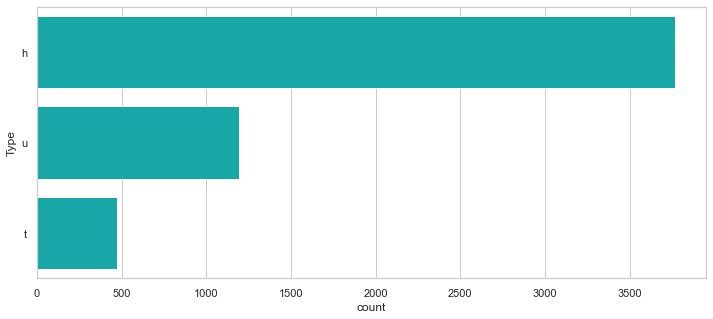

In [12]:
sns.countplot(y="Type", data=train_set, color="c")

It would be interesting to visualize all features (numerical and catergorical) in order to undertand them.

Check out this blog for plotting distribution: https://seaborn.pydata.org/tutorial/distributions.html
+ Seaborn version of this blog can be different from the one intalled in your machine (version 0.11 has been just realeased)

Check out this blog for plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

C:\Users\Miguel\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


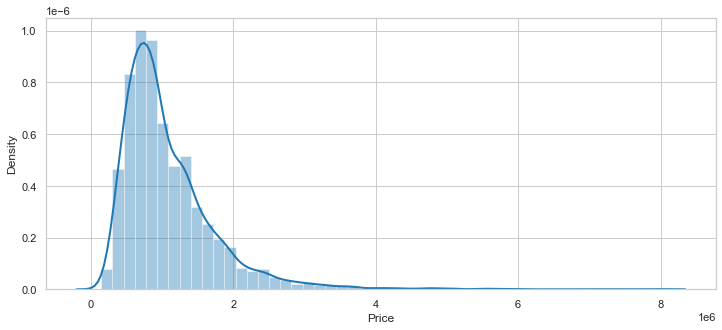

In [13]:
sns.distplot(train_set["Price"])
plt.show()

In [14]:
b=np.array(train_set["BuildingArea"])

In [15]:
b=train_set["BuildingArea"].copy()
train_set["BuildingArea"]


index
0         NaN
1         NaN
2       116.0
3         NaN
4       164.0
        ...  
5427      NaN
5428     93.0
5429      NaN
5430     79.0
5431    147.0
Name: BuildingArea, Length: 5432, dtype: float64

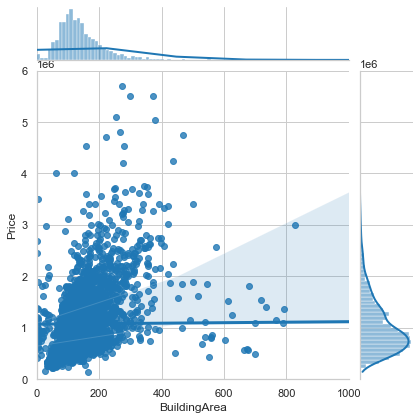

In [16]:
sns.jointplot(data=train_set, x="BuildingArea", y="Price",kind="reg",xlim=(0,1000),ylim=(0,6000000))

## BASELINE MODEL
### https://www.kaggle.com/c/mlub-housing-house-prediction/notebooks

This is a simple model that uses the K-nearest Neighbors Regressor

This model only uses 4 feaures: 'Rooms','Landsize', 'BuildingArea', 'YearBuilt'

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
y_pred: 
(5432, 1)
----- EVALUATION ON TRAIN SET ------
RMSE 397813.8038017269
R^2:  0.6219552116625728


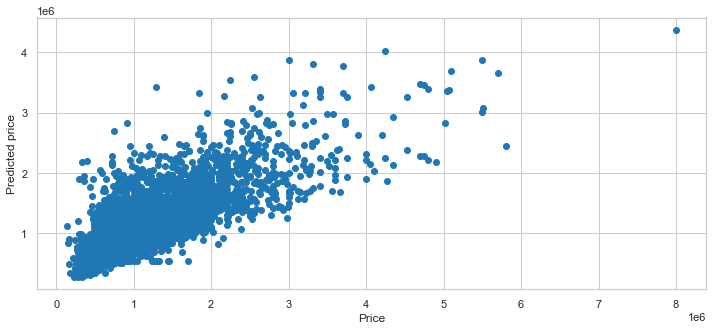

In [17]:
## the features

features = ['Rooms','Landsize', 'BuildingArea', 'YearBuilt']
## DEFINE YOUR FEATURES
X = train_set[features].fillna(0)
y = train_set[['Price']]

## the model
# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)
model = neighbors.KNeighborsRegressor(n_neighbors)
print(type(model))
## fit the model
model.fit(X, y)

## predict training set
y_pred = model.predict(X)
print("y_pred: ")
print(y_pred.shape)
## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
#                  sum((y - y_pred)**2)/total
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))


plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

## predict the test set and generate the submission file
X_test = test_set[features].fillna(0)
y_pred = model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('output/session1/baseline.csv',index=False)

## EXERCICE - TRAIN A MODEL and upload your best solution to the Kaggle Challenge

Tasks: 
+ Choose the best features for the problem. Some features are numercial but others categorical, think how to codify all of them.
+ Choose the model. You have two choice: LinearRegression and KNeighborsRegressor
    + You can chanege the paramenter n_neighbors from the KNeighborsRegressor
    
LINEAR REGRESSOR:
>from sklearn.linear_model import LinearRegression

>model = LinearRegression()

KNeighborsRegressor
> from sklearn import neighbors

> n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)

> model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)


# Introduction:

From now on, the cells below show the work I have done trying to get the best possible understanding of the problem and the best solution according to that understanding.

### Aclarations:
#### 1. Feature vs Column:
I use indistinctly the words feature and column, since in DataFrames, each column represents one feature of the data.
#### 2. Dummie:
I use the word _dummie_ a lot, and it refers to the result of taking a categorical column and trying to represent it with 1's and 0's.
You make a new column for every unique value in the original column, and each new column represents if the value in the row was that one (1) or was another one (0). 

Using this trick we can transform categorical features into numerical ones, at the cost of adding complexity to the model. (In the Knn we can talk directly about adding dimensions).

##### Example:

##### Original "Type":

_Type_     
        h<br>
        t<br>
        h<br>
        u<br>
        h<br>
##### Dummies from "Type":
_h   t   u_                    
           1       0       0<br>
           0       1       0<br>
           1       0       0<br>
           0       0       1<br>
           1       0       0<br>


## Preprocessing functions: 

In [18]:
def apply_numerical_preprocessing(df,num_features):
    #Just applies the below functions to the numerical features.
    fill_nan(df,num_features)
    clean_outlayers(df,num_features)
    normalize(df,num_features)
def describe(df,num_features):
    for f in num_features:
        print(f+": ")
        print(df.loc[:,f].describe())
        print()
def clean_outlayers(df,num_features,q=0.01):
    """
    I considered the outlayers anything below/above the 1/99 percentile.
    I replaced them with those values so, even though I change them, they still
    are in the extremes and the model takes that into account.
    
    This could work fine for the "true" outlayers, but if an outlayer was a typo mistake it could be a bad solution.
    """
    for f in num_features:
        q_high=df.loc[:,f].quantile(q=1-q)
        q_low =df.loc[:,f].quantile(q=q)
        arr_f=pd.Series.to_numpy(df.loc[:,f])
        arr_f[arr_f>q_high]=q_high
        arr_f[arr_f<q_low]=q_low
        df.loc[:,f]=arr_f
def fill_nan(df,num_features):
    """
    First of all, I ONLY fill the nans in the numerical features.
    
    I decided trying both mean and median and median gave best results.
    
    The one thing about median that I like is that you are using a value that already exists in the dataset. 
    In the case of AreaBuilt it is not really a problem to use the mean, because there are a lot of different values
    (I consider it a continuous variable), but in the case of Rooms, a discrete variable, it could lead to a new dicrete value (ex: 1.8 Rooms)
    that did not exist previously and could potentially cause problems.
    
    Finally I made the Landsize feature to be filled with Zeros because it had sense that if a house did not had Landsize,
    it just was left blank. (In the train_set there were no nans in the Landsize column, but I did realize that later).
    """
    for f in num_features:
        if(f=='Landsize'):
            df.loc[:,f]=df.loc[:,f].fillna(value=0.)
        else:
            median=pd.Series.median(df.loc[:,f])
            df.loc[:,f]=df.loc[:,f].fillna(value=median)
def normalize(df,num_features):
    """
    Just normalizing the values so that in the Knn every feature represented in a dimension had the same "impact" because of the distance. 
    """
    for f in num_features:
        max_value=df.loc[:,f].max()
        min_value=df.loc[:,f].min()
        if(max_value-min_value != 0):
            df.loc[:,f]=(df.loc[:,f]-min_value)/(max_value-min_value)
        else:
            #Just in case
            df.loc[:,f]=df.loc[:,f]/(max_value)

            
def clean_dummies(df,selected_dummies):
    """
    This function was meant to try and use only some values from the categorical features, but that did not end up giving a better result,
    so finally it was not used.
    """
    
    #selected_dummies is a list of tuples in which for every element s
    #s[0] is the name of a column.
    #s[1] are the values selected for that column.
    for s in selected_dummies:
        col_name=s[0]
        to_remove=df[col_name].unique().tolist()
        for value in s[1]:
            # We remove the values we want to keep from the to_remove list.
            to_remove.remove(value)
        #Every value in the to_remove list is replaced with a nan (so it is easier to make dummies of the column)
        df[col_name]=df[col_name].replace(to_replace=to_remove,value=np.nan)

def make_dummies(df,cat_features):
    """
    Function to make the "Dummies". 
    This will transform each categorical feature into a lot of numerical features. (One for every unique value).
    """
    for f in cat_features:
        dummies = pd.get_dummies(df[f],prefix=f, dummy_na=False)
        df = df.drop(f,1)
        df = pd.concat([df,dummies], axis=1 )
    return df
def get_dummies_names(df, cat_features):
    """
    Returns a list with the name of the dummies made in the make_dummies() function.
    """
    dummies=[]
    for cat in cat_features:
        for col in df.columns:
            if cat in col:
                dummies.append(col)
    return dummies
def clean_zeros_for_log(df,num_features):
    """
    For cleaning the Zeros I tried to maintain something reasonable for the different num characteristics.
    I wanted it to be the least "Hardcoded" posible solution, so that it didn't depend a lot on the guessing.
    I tried to avoid adding just a 0.1, because it can be very different for different data entries.
    
    Finally I decided that all the Zeros could be replaced with a value smallest than the 1 percentil (without the Zeros),
    so i tried that *0.1 and it worked fine and consistent. 
    I know my solution it still is kind of hardcoded but depends much more on the data than just an addition.
    """
    for f in num_features:
        if(0 in df[f].unique()):
            df[f]=df[f].replace(to_replace=0,value=np.nan)
            q=df[f].quantile(q=0.01)
            df[f]=df[f].replace(to_replace=np.nan,value=q*0.1)
            #df[f]=df[f].replace(to_replace=np.nan,value=q)
def apply_log(df,log_features):
    """To apply the Log to some of the numerical features first I had to do some preprocessing:
    
    First we fill the nan values with something reasonable (mean/median).
    
    Afterwards we want the outlayers to disappear.
    
    Then we need to ensure there are no Zeros or negative numbers, because the Log function is only defined in the positive domain.
    (In this implementation I don't care of the negative numbers because I was not going to use any variable with posible negative values)
    
    Later we apply the Log function.
    
    Last but not least, we normalize the results.
    
    """
    fill_nan(df,log_features)
    clean_outlayers(df,log_features)
    clean_zeros_for_log(df,log_features)
    for f in log_features:
        df[f]=np.log(df.loc[:,f])
    normalize(df,log_features)

## Plots
I have used the recomended seaborn library for the plots, since it is very easy to use and very powerful.

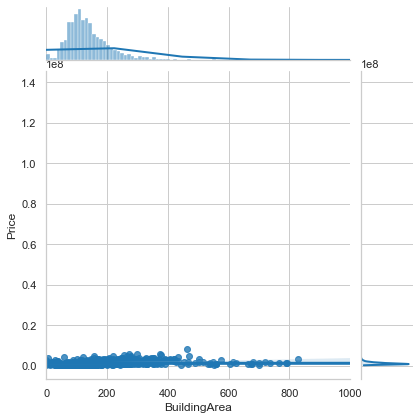

In [19]:

#Useful to visualize the relation of categorical features and the price.
#sns.catplot(x="Type", y="Price", kind="box", data=train_set)
#Useful to visualize the relation of numerical features and the price. It even does a regression line, the blue line in the plot.
sns.jointplot(data=train_set, x="BuildingArea", y="Price",kind="reg",xlim=(0,1000))#,ylim=(0,6000000))

## Trying Selected Dummies
The below cell was an attempt to try and get which categorical variables could be worth considering.
The idea was that there are a lot of categorical features which have lots of diferent values and making 
hundreds of diferent Dummie features was not an option because it would result in too many dimensions. 
So maybe I could choose only the values of those categorical features that had a significant deviation 
from the mean and let the other values without any Dummies.

This piece of code was meant to get an idea of which ones could be a good starting point, but finally 
I *DID NOT* put it in the final version. (It simply gave worst results)

In [20]:
relevantes=[]

#All categorical features
all_cate=['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea','Regionname']
#Cate is just to select the ones I want to visualize
cate=['Suburb',  'Type','SellerG', 'Postcode', 'CouncilArea', 'Propertycount']
for f in cate:
    rel=[]
    da=train_set.copy()
    columna=f
    price_mean=train_set.loc[:,"Price"].mean()
    col=da.loc[:,[columna,"Price"]]
    # Arbitrary number to get something that was at least a considerable number of samples
    num=100
    value_counts=col[columna].value_counts()
    print(value_counts.shape)
    #value_counts.drop(labels=value_counts.loc[value_counts<num].index,axis="index")
    #Drop the 
    index=value_counts.loc[value_counts<num].index
    for ind in index:
        drop_index=col[col[columna]==ind].index
        col=col.drop(labels=drop_index,axis="index")
    col.count()
    col.loc[:,"Price"]=col.loc[:,"Price"]-price_mean
    #col.head(20)
    
    #sns.catplot(x=f, y="Price", kind="box", data=col)

    nombre=[]
    diferencia=[]
    for cat in col.loc[:,columna].unique():
        nombre.append
        index_suburb=col[col[columna]==cat].index
        mean_diff = col.loc[index_suburb,"Price"].mean()

        nombre.append(cat)
        diferencia.append(mean_diff)
    #Here we have a new DataFrame with the name of every value in the Categorical Feature and the difference of means.
    df_diff=pd.DataFrame({
        "Diff":np.array(diferencia,dtype=np.float64),
        "Nombre":nombre
    })
    #df_diff.loc[:,"Diff"]=pd.DataFrame.abs(df_diff.loc[:,"Diff"])
    print("_________",f,"__________")
    df_diff_aux=df_diff.sort_values(by="Diff",ascending=False).head(3)
    print(df_diff_aux)
    relevantes.append((f,df_diff_aux.loc[:,"Nombre"].tolist()))
    df_diff_aux=df_diff.sort_values(by="Diff",ascending=True).head(3)
    print(df_diff_aux)
    #relevantes.append((f,df_diff_aux.loc[:,"Nombre"].tolist()))
relevantes

(292,)
_________ Suburb __________
            Diff          Nombre
1   14097.771426  Bentleigh East
0 -389612.892910       Reservoir
            Diff          Nombre
0 -389612.892910       Reservoir
1   14097.771426  Bentleigh East
(3,)
_________ Type __________
            Diff Nombre
0  166281.309152      h
2 -117780.145510      t
1 -478577.480851      u
            Diff Nombre
1 -478577.480851      u
2 -117780.145510      t
0  166281.309152      h
(203,)
_________ SellerG __________
             Diff     Nombre
6   839235.898362   Marshall
1   282683.528250     Jellis
10  193893.162146  Fletchers
            Diff Nombre
4 -271652.514990   Brad
3 -213623.262428  Barry
9 -211943.536267    Ray
(187,)
_________ Postcode __________
           Diff  Nombre
0  21567.049099  3040.0
5  14097.771426  3165.0
6 -55844.445357  3121.0
            Diff  Nombre
2 -420629.544267  3020.0
4 -389612.892910  3073.0
7 -344702.536267  3012.0
(32,)
_________ CouncilArea __________
             Diff       

[('Suburb', ['Bentleigh East', 'Reservoir']),
 ('Type', ['h', 't', 'u']),
 ('SellerG', ['Marshall', 'Jellis', 'Fletchers']),
 ('Postcode', [3040.0, 3165.0, 3121.0]),
 ('CouncilArea', ['Bayside', 'Boroondara', 'Stonnington']),
 ('Propertycount', [10969.0, 8870.0, 21650.0])]

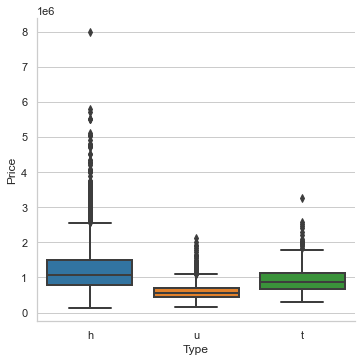

In [21]:
sns.catplot(x="Type", y="Price", kind="box", data=train_set)

In [22]:
def count_popular(df,cat_features):
    # Just to get an idea of how many different values every categorical feature has.
    for f in cat_features:
        print("__________"+f+"___________")
        print("Number of unique values: ",df.loc[:,f].nunique())
        print("MOST POPULAR: ")
        print(df.loc[:,f].value_counts().sort_values(ascending=False).head(10))
        print()
count_popular(train_set,cate)

count_popular(train_set,["Landsize"])

__________Suburb___________
Number of unique values:  292
MOST POPULAR: 
Reservoir         143
Bentleigh East    104
Preston            96
Richmond           96
Brunswick          94
Essendon           93
Hawthorn           85
Glen Iris          83
Brighton           81
Coburg             78
Name: Suburb, dtype: int64

__________Type___________
Number of unique values:  3
MOST POPULAR: 
h    3765
u    1191
t     476
Name: Type, dtype: int64

__________SellerG___________
Number of unique values:  203
MOST POPULAR: 
Nelson           603
Jellis           527
hockingstuart    478
Barry            409
Ray              300
Marshall         283
Buxton           239
Biggin           161
Brad             141
Fletchers        126
Name: SellerG, dtype: int64

__________Postcode___________
Number of unique values:  187
MOST POPULAR: 
3073.0    143
3020.0    125
3040.0    123
3121.0    110
3058.0    106
3165.0    104
3163.0    104
3012.0    100
3046.0     98
3072.0     96
Name: Postcode, dtype: int

## Log and Correlation:
The below Cell has the intention of showing the correlation of different numerical features.
We look at the correlation between:
    The original values and the price
    The Log of the original values and the price

In both cases we use the Pearson's correlation coefficient.

Looking at the results, our attention is caught by the big difference between the results in the BuildingArea and Landsize rows.
We can see that the correlation in much bigger in the Log column, and for that reason I tried using both BuildingArea and Landsize 
Log as an input for the model with better results.

The reason behind this is probably that both the BuildingArea and the Landsize have a non linear relation with the price, 
but a relation that once we apply the Log function, turns much more linear. 
Talking more clearly, the Log function turns *exponentials (non linear)* into *multipliers (linear)*.

In [23]:

fe=['Price',
    'Rooms',
    'Bathroom',
    'Car',
    'Landsize',
    'BuildingArea',
    'YearBuilt',
    'Lattitude',
    'Longtitude']

method = 'pearson'

#Just for the desired columns/features
corr=train_set.copy()
drop_list=[x for x in corr.columns if x not in fe]
corr=corr.drop(labels=drop_list,axis="columns")
corr_log = corr.copy()
apply_log(corr_log,fe)

#Log(values). Pearson correlation
log=corr_log.corr(method=method).loc["Price"]
#Original values. Pearson correlation
corr=corr.corr(method=method).loc["Price"]

correlaciones = pd.DataFrame({
    "Normal":corr,
    "Log":log
})
correlaciones

C:\Users\Miguel\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Normal,Log
Rooms,0.494941,0.577387
Price,1.000000,1.000000
Bathroom,0.459137,0.444170
Car,0.227902,0.162296
Landsize,0.048182,0.382378
BuildingArea,0.061963,0.451549
YearBuilt,-0.352157,-0.294558
Lattitude,-0.206769,NaN
Longtitude,0.199303,0.242404


In [24]:
nombre_columna="BuildingArea"
cleaned_train=train_set.copy()
#apply_numerical_preprocessing(cleaned_train,[nombre_columna])


df_log = train_set.copy()

#fill_nan(df_log,[nombre_columna])
#clean_outlayers(df_log,[nombre_columna])
#clean_zeros_for_log(df_log,[nombre_columna])
apply_log(df_log,[nombre_columna])
minn=df_log[nombre_columna].min()
maxx=df_log[nombre_columna].min()
max_columna=cleaned_train[nombre_columna].quantile(q=0.99)

Correlación Pearson  BuildingArea : 0.06196311175467968


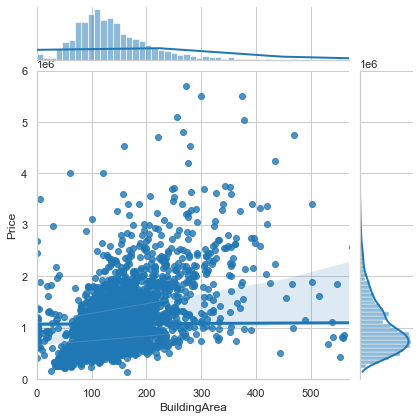

In [25]:
print("Correlación Pearson ",nombre_columna,":",cleaned_train.corr().loc[:,"Price"].loc[nombre_columna])
sns.jointplot(data=cleaned_train, x=nombre_columna, y="Price",xlim=(0,max_columna*1.1),ylim=(0,6000000),kind="reg")

Correlación Pearson LOG  BuildingArea : 0.40404275560945835


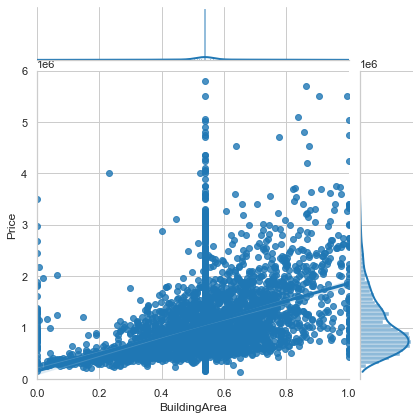

In [26]:
print("Correlación Pearson LOG ",nombre_columna,":",df_log.corr().loc[:,"Price"].loc[nombre_columna])
sns.jointplot(data=df_log, x=nombre_columna, y="Price",xlim=(0,1),ylim=(0,6000000),kind="reg")

As a conclusion we can say that using the Log function we can achieve a better correlation between the input and the output.
(See the above plots, the blue line is a linear regression. In the second plot we can percieve that the line is a better aproximation of the values).

## The Final Model:

Number of features:  8
----- EVALUATION ON TRAIN SET ------
RMSE 234067.5455756088
R^2:  0.8691222077851053
                    Price  Predicted Price
Price            1.000000         0.932528
Predicted Price  0.932528         1.000000


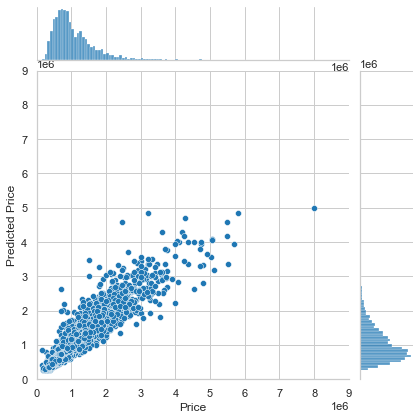

In [27]:
# KNN model

train_set_run = train_set.copy()

# Selected features:
num_features = ['Rooms',"Bathroom","Lattitude","Longtitude"]
log_features = ['Landsize']
cat_features = ['Type']

#Trying with selected dummies.
# selected_dummies=dummies_prueba # Only if using a selection of categorical values

# PREPROCESSING THE FEATURES:

# Numerical features
apply_numerical_preprocessing(train_set_run,num_features)
apply_numerical_preprocessing(test_set,num_features)

# Log features (Also numerical but with different treatment)
apply_log(train_set_run,log_features)
apply_log(test_set,log_features)

# Categorical features
"""
Trying with selected dummies.
This code is the one which should be used in case of trying to put only the most interesting values of the categorical columns.

clean_dummies(train_set_run,selected_dummies)
clean_dummies(test_set,selected_dummies)
for sd in selected_dummies:
    if not sd[0] in cat_features:
        cat_features.append(sd[0])
"""
train_set_run = make_dummies(train_set_run,cat_features)
test_set = make_dummies(test_set,cat_features)
cat_dummies  = get_dummies_names(train_set_run,cat_features)



# Final features

features = num_features + cat_dummies + log_features
total_number_features=len(features)
print("Number of features: ",total_number_features)
## DEFINE YOUR FEATURES
X = train_set_run[features]
y = train_set[['Price']]

## the model
# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)
model = neighbors.KNeighborsRegressor(n_neighbors)

## fit the model
model.fit(X, y)

## predict training set
y_pred = model.predict(X)

## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
rmse=np.sqrt(mean_squared_error(y, y_pred))
print("RMSE",rmse)
r2=r2_score(y, y_pred)
print("R^2: ",r2)

# To get the correct shape I had to use .ravel() 
plot_y      = pd.DataFrame.to_numpy(y).ravel()
plot_y_pred = y_pred.ravel()

result = pd.DataFrame({"Price":plot_y,
                      "Predicted Price":plot_y_pred})

# I prefer this plot.
sns.jointplot(data=result, x="Price", y="Predicted Price",xlim=(0,9000000),ylim=(0,9000000))#,kind="reg")
print(result.corr())
"""
plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()
"""
## predict the test set and generate the submission file

X_test = test_set[features]
y_pred = model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

#df_output.to_csv('/kaggle/input/mlub-housing-house-prediction/sampleSubmission.csv',index=False)


#### Explain the choosed model and why you think that is is the best

I have chosen the Knn model since I tried both it gave best results and it had more sense for me because of the disposition of the data.

I think the price of a house is usually not as close to a sum of variables as it is from something similar to the other houses with those characteristics, location etc. I think that is the reason why the Knn works better in this problem.

The features I have chosen are partly because they had sense, and partly because I have tried different combinations to see if the results got better. The final improvements were achieved by removing features instead of adding them.

Another curios thing is that I did not use the BuildingArea in the final model. There are some reasons for this:
    1. Both BuildingArea and Landsize gave a similar information for problem, and they had a really close correlation between them. The problem with two features with a lot of correlation between them is that they usually do not give more information, but they increase the complexity of the model, leading to a worst result.
    2. There were a lot of rows without a BuildingArea (2542 NaN's out of 5432 rows), and that was really bad for the model even though intuitively everybody would say that the building area of a house is usually a very important feature. In opposition, the Landsize column was filled without any nan, and that made the results better even though there were a lot of rows with Landsize == 0.

Something similar happened with the features Rooms and Bedroom2, they were too correlated to work well toghether.

I selected Lattitude and Longtitude because close houses usually are in zones with similar price.

I selected Type because it worked pretty well even though it is a pretty simple feature. 

As a conclusion I think keeping things simple in this problem has been a good "direction", since too much complexity did not make any better.